# Task 7.2
- Registration/Referral id : SIRSS2190
- Full name : Akshay Sanjay Chaudhari
- House Prices - Advanced Regression Techniques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
sol = test_data['Id']

# Displaying first 10 rows

In [4]:
train_data.head(10)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
test_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


# Gathering information about our dataset

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:

test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

# Handelling duplicate and null values

In [8]:
train_data.duplicated().sum()

0

In [9]:

train_data.isnull().sum().values

array([   0,    0,    0,  259,    0,    0, 1369,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    8,    8,    0,    0,    0,   37,   37,   38,
         37,    0,   38,    0,    0,    0,    0,    0,    0,    1,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,  690,   81,   81,   81,    0,    0,   81,   81,    0,
          0,    0,    0,    0,    0,    0, 1453, 1179, 1406,    0,    0,
          0,    0,    0,    0], dtype=int64)

In [10]:
train_data.drop('PoolQC', axis = 1, inplace = True)
test_data.drop('PoolQC', axis = 1, inplace = True)
train_data.drop('Fence', axis = 1, inplace = True)
test_data.drop('Fence', axis = 1, inplace = True)
train_data.drop('MiscFeature', axis = 1, inplace = True)
test_data.drop('MiscFeature', axis = 1, inplace = True)
train_data.drop('Alley', axis = 1, inplace = True)
test_data.drop('Alley', axis = 1, inplace = True)

In [11]:

train_data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [12]:
test_data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal


In [13]:
train_data['LotFrontage'].replace(np.nan, train_data['LotFrontage'].mean(), inplace = True)
train_data['MasVnrType'].replace(np.nan, train_data['MasVnrType'].mode()[0], inplace = True)
train_data['MasVnrArea'].replace(np.nan, train_data['MasVnrArea'].mode()[0], inplace = True)
train_data['BsmtQual'].replace(np.nan, train_data['BsmtQual'].mode()[0], inplace = True)
train_data['BsmtCond'].replace(np.nan, train_data['BsmtCond'].mode()[0], inplace = True)
train_data['BsmtExposure'].replace(np.nan, train_data['BsmtExposure'].mode()[0], inplace = True)
train_data['BsmtFinType1'].replace(np.nan, train_data['BsmtFinType1'].mode()[0], inplace = True)
train_data['BsmtFinType2'].replace(np.nan, train_data['BsmtFinType2'].mode()[0], inplace = True)
train_data['FireplaceQu'].replace(np.nan, train_data['FireplaceQu'].mode()[0], inplace = True)
train_data['GarageType'].replace(np.nan, train_data['GarageType'].mode()[0], inplace = True)
train_data['GarageYrBlt'].replace(np.nan, train_data['GarageYrBlt'].mean(), inplace = True)
train_data['GarageFinish'].replace(np.nan, train_data['GarageFinish'].mode()[0], inplace = True)
train_data['GarageQual'].replace(np.nan, train_data['GarageQual'].mode()[0], inplace = True)
train_data['GarageCond'].replace(np.nan, train_data['GarageCond'].mode()[0], inplace = True)
train_data['Electrical'].replace(np.nan, train_data['Electrical'].mode()[0], inplace = True)

In [14]:
test_data['LotFrontage'].replace(np.nan, test_data['LotFrontage'].mean(), inplace = True)
test_data['MasVnrType'].replace(np.nan, test_data['MasVnrType'].mode()[0], inplace = True)
test_data['MasVnrArea'].replace(np.nan, test_data['MasVnrArea'].mode()[0], inplace = True)
test_data['BsmtQual'].replace(np.nan, test_data['BsmtQual'].mode()[0], inplace = True)
test_data['BsmtCond'].replace(np.nan, test_data['BsmtCond'].mode()[0], inplace = True)
test_data['BsmtExposure'].replace(np.nan, test_data['BsmtExposure'].mode()[0], inplace = True)
test_data['BsmtFinType1'].replace(np.nan, test_data['BsmtFinType1'].mode()[0], inplace = True)
test_data['BsmtFinType2'].replace(np.nan, test_data['BsmtFinType2'].mode()[0], inplace = True)
test_data['FireplaceQu'].replace(np.nan, test_data['FireplaceQu'].mode()[0], inplace = True)
test_data['GarageType'].replace(np.nan, test_data['GarageType'].mode()[0], inplace = True)
test_data['GarageYrBlt'].replace(np.nan, test_data['GarageYrBlt'].mean(), inplace = True)
test_data['GarageFinish'].replace(np.nan, test_data['GarageFinish'].mode()[0], inplace = True)
test_data['GarageQual'].replace(np.nan, test_data['GarageQual'].mode()[0], inplace = True)
test_data['GarageCond'].replace(np.nan, test_data['GarageCond'].mode()[0], inplace = True)
test_data['Electrical'].replace(np.nan, test_data['Electrical'].mode()[0], inplace = True)

In [15]:
test_data.fillna(0, inplace = True)

In [16]:
test_data.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [17]:

train_data.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

# Getting statistical insights
- This step should be performed for getting details about various statistical data like Mean, Standard Deviation, Median, Max Value, Min Value, Correlation.

In [18]:

train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [19]:
train_data.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.178699,0.215828,...,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.051071,0.023573,0.178699,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.005024,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [20]:

plt.style.use('seaborn-darkgrid')

<AxesSubplot:>

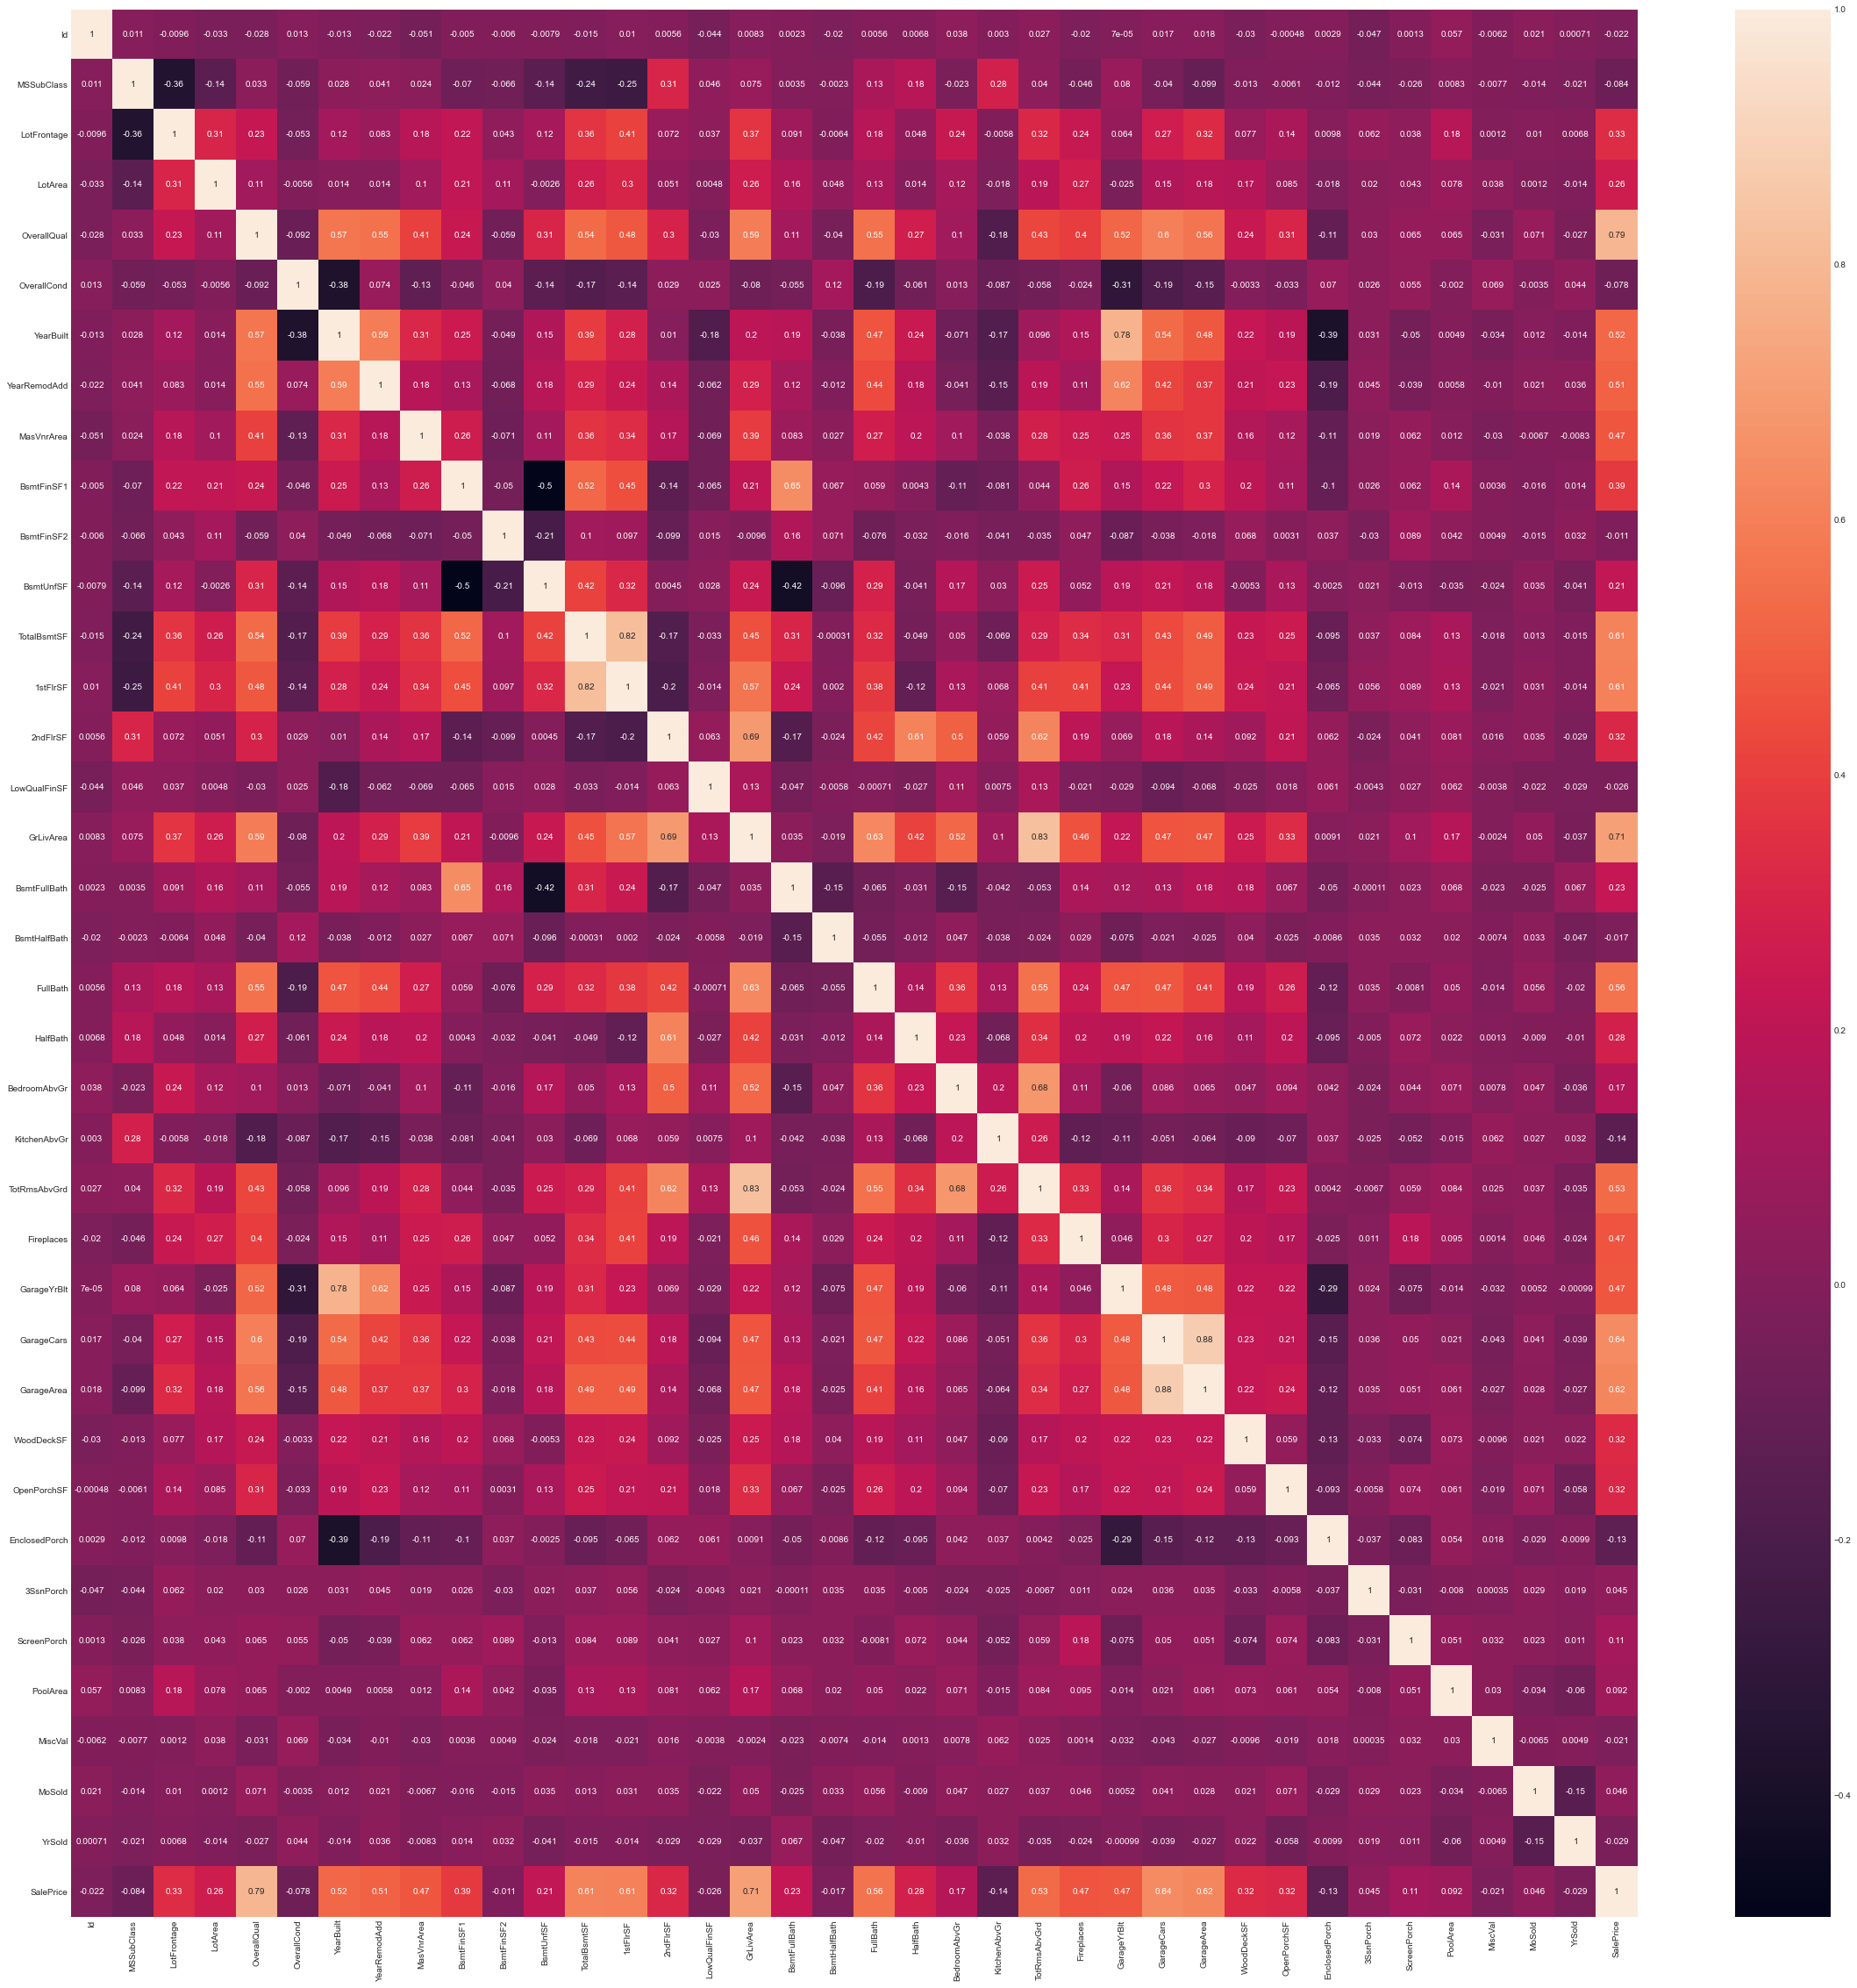

In [21]:

plt.figure(figsize = (40, 40))
sns.heatmap(train_data.corr(), annot = True)

# Graphical Analysis
Analyzing the two variables from a dataset is known as Graphical analysis. We can analyze it in number different ways using various kinds of plots provided by python library.

- Violinplot
- Pairplot
- Scatterplot
- Barplot
- Lineplot
- Countplot

# Violinplot :

A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

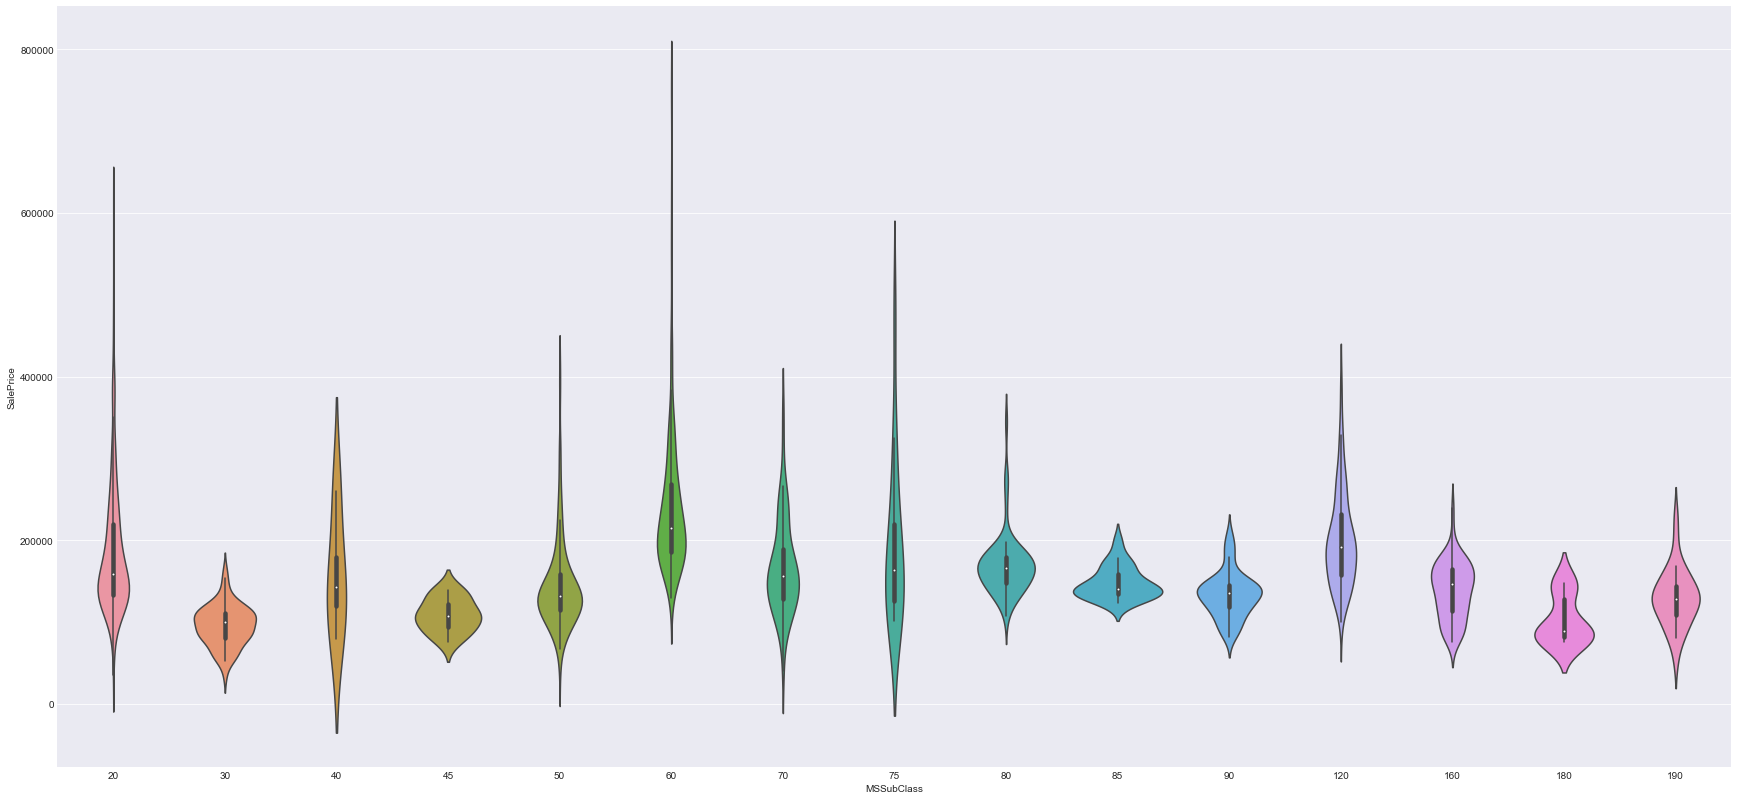

In [22]:
plt.figure(figsize = (30, 14))
sns.violinplot(x = 'MSSubClass', y = 'SalePrice', data = train_data)

# Pairplot:
A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.

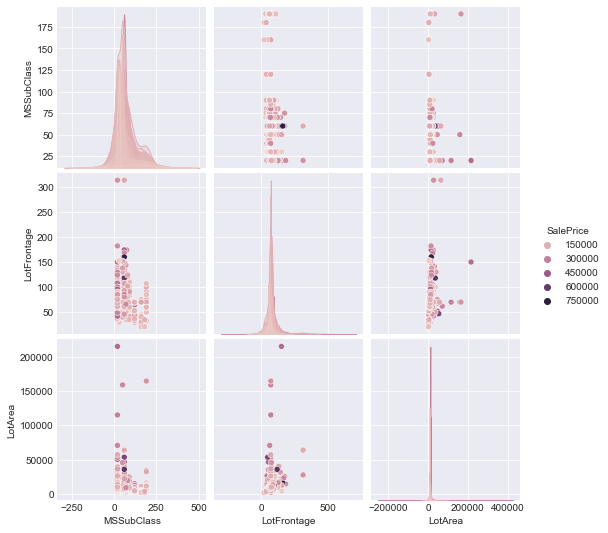

In [23]:

sns.pairplot(data = train_data, vars = ['MSSubClass', 'LotFrontage', 'LotArea'], hue = 'SalePrice')

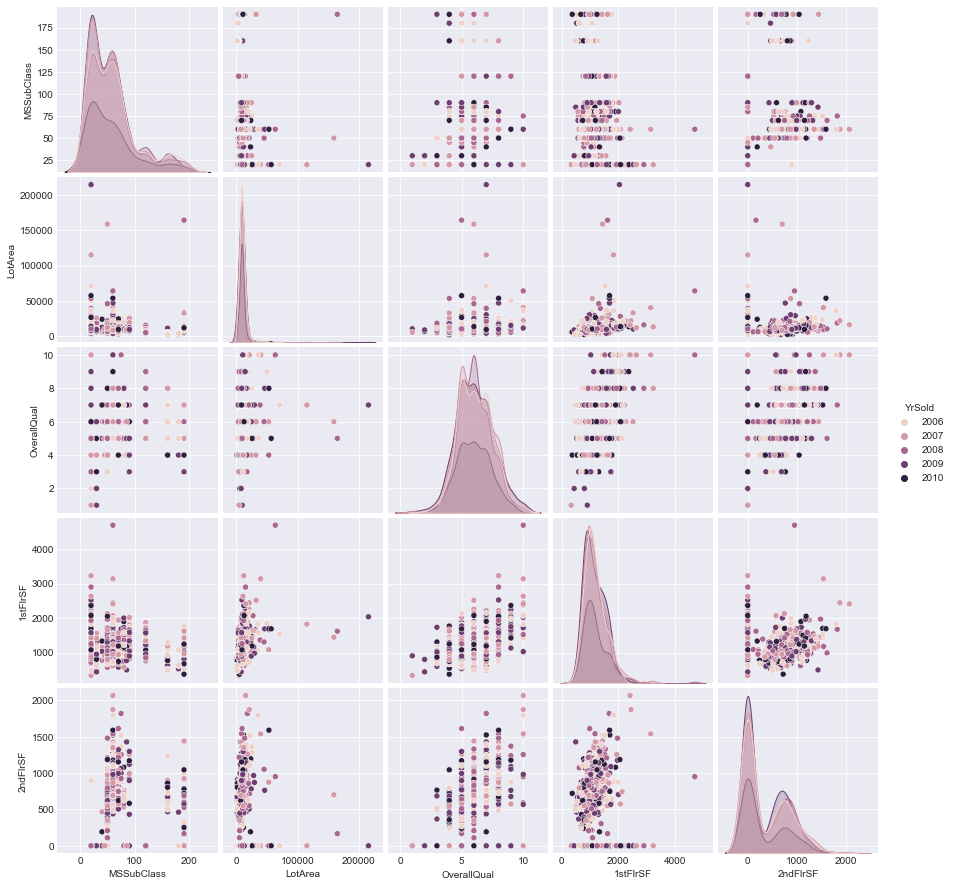

In [24]:
sns.pairplot(data = train_data , vars = ['MSSubClass', 'LotArea', 'OverallQual', '1stFlrSF', '2ndFlrSF'], hue = 'YrSold')

# Scatterplot:
The scatter plot is a mainstay of statistical visualization. It depicts the joint distribution of two variables using a cloud of points, where each point represents an observation in the dataset. This depiction allows the eye to infer a substantial amount of information about whether there is any meaningful relationship between them.

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

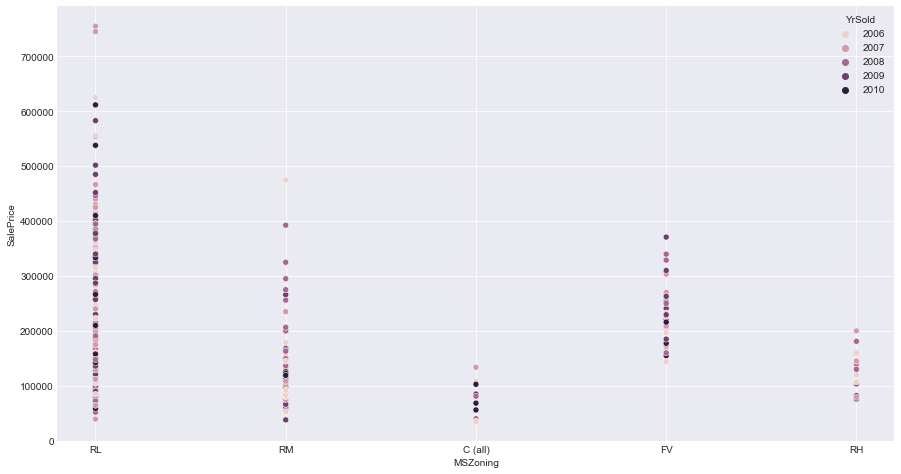

In [25]:
plt.figure(figsize = (15, 8))
sns.scatterplot(x = 'MSZoning', y = 'SalePrice', hue = 'YrSold', data = train_data)

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

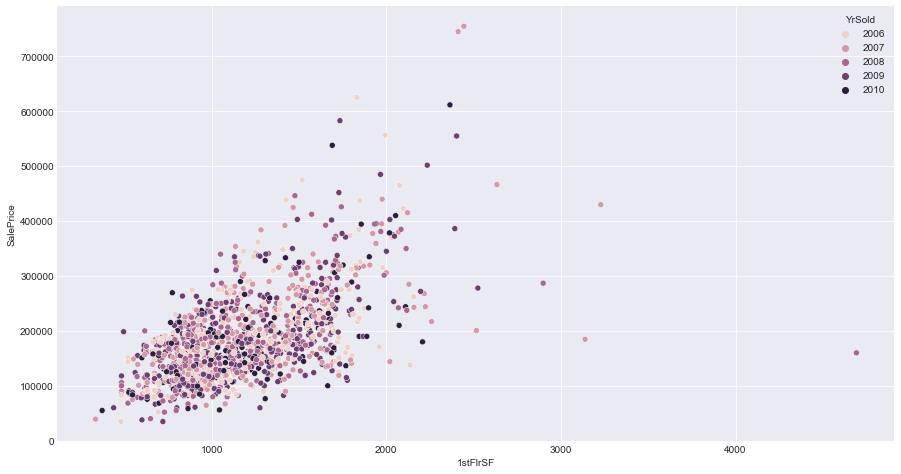

In [26]:
plt.figure(figsize = (15, 8))
sns.scatterplot(x = '1stFlrSF', y = 'SalePrice', hue = 'YrSold', data = train_data)

<AxesSubplot:xlabel='2ndFlrSF', ylabel='SalePrice'>

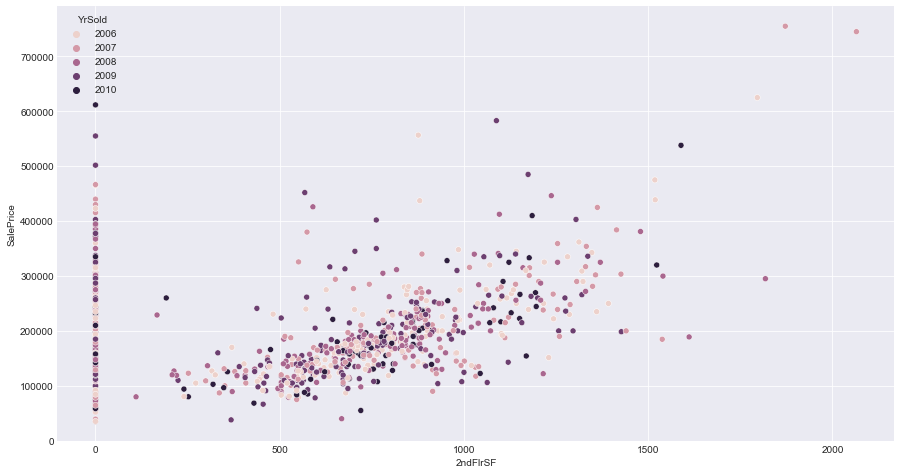

In [27]:
plt.figure(figsize = (15, 8))
sns.scatterplot(x = '2ndFlrSF', y = 'SalePrice', hue = 'YrSold', data = train_data)

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

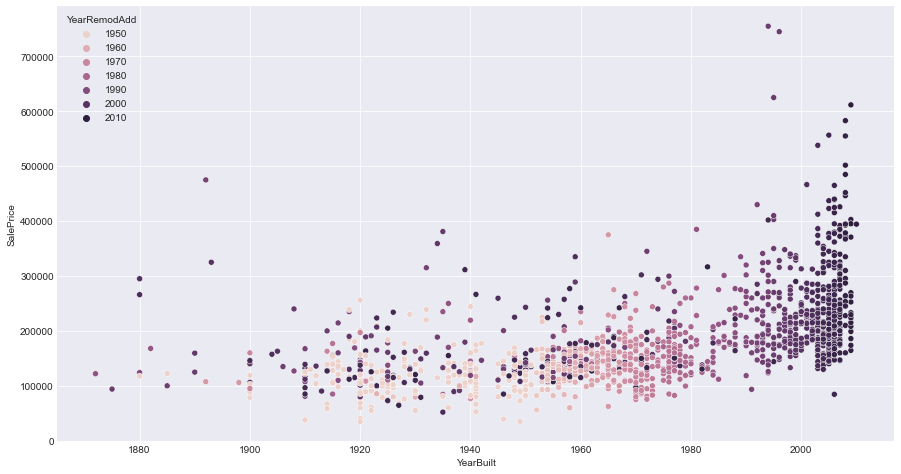

In [28]:
plt.figure(figsize = (15, 8))
sns.scatterplot(x = 'YearBuilt', y ='SalePrice', hue = 'YearRemodAdd', data = train_data)

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

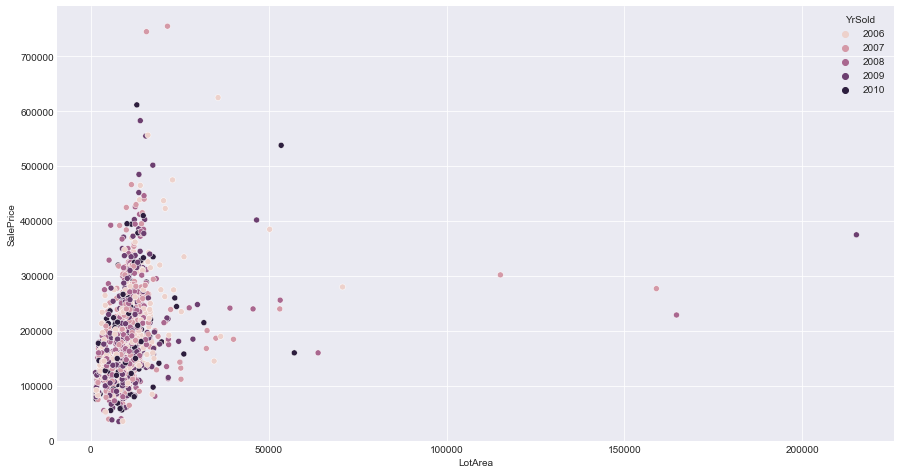

In [29]:
plt.figure(figsize = (15, 8))
sns.scatterplot(x = 'LotArea', y ='SalePrice', hue = 'YrSold', data = train_data)

# Barplot:
A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars. Bar plots include 0 in the quantitative axis range, and they are a good choice when 0 is a meaningful value for the quantitative variable, and you want to make comparisons against it.

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

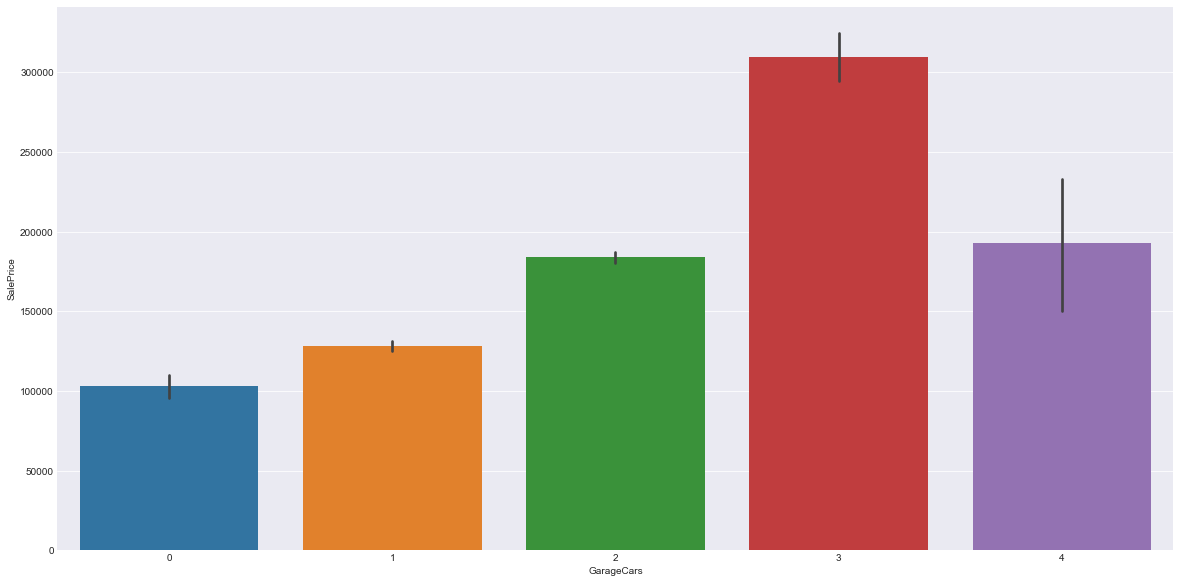

In [30]:
plt.figure(figsize = (20, 10))
sns.barplot(train_data['GarageCars'], train_data['SalePrice'])

<AxesSubplot:xlabel='BsmtExposure', ylabel='SalePrice'>

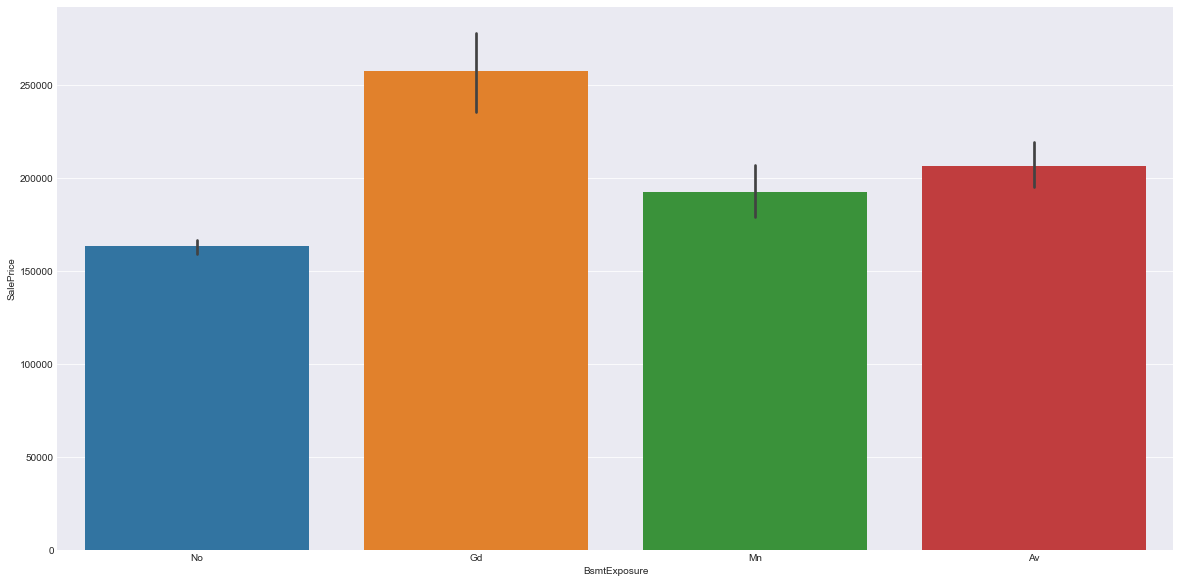

In [31]:

plt.figure(figsize = (20, 10))
sns.barplot(train_data['BsmtExposure'], train_data['SalePrice'])

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

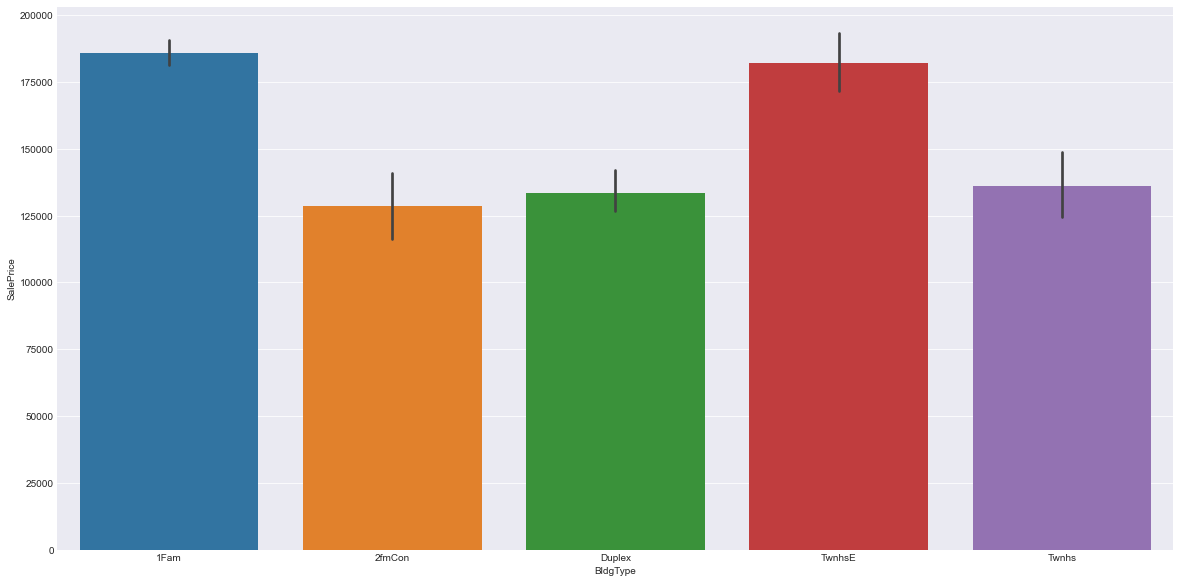

In [32]:

plt.figure(figsize = (20, 10))
sns.barplot(train_data['BldgType'], train_data['SalePrice'])

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

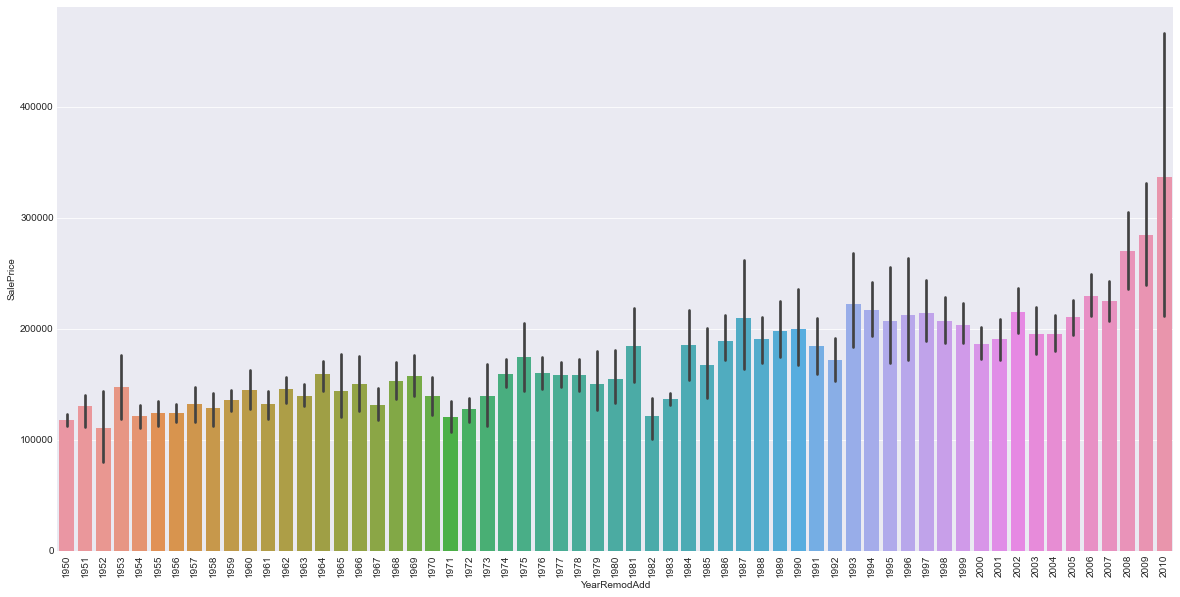

In [33]:
plt.figure(figsize = (20, 10))
plt.xticks(rotation = 90)
sns.barplot(train_data['YearRemodAdd'], train_data['SalePrice'])

<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

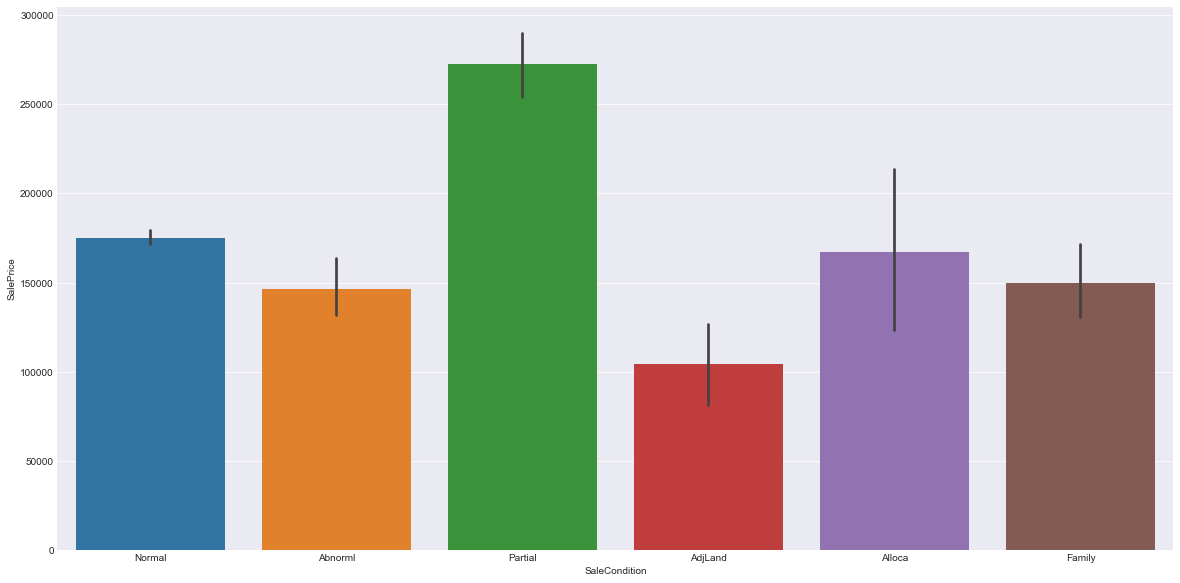

In [34]:
plt.figure(figsize = (20, 10))
sns.barplot(train_data['SaleCondition'], train_data['SalePrice'])

# Lineplot:

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

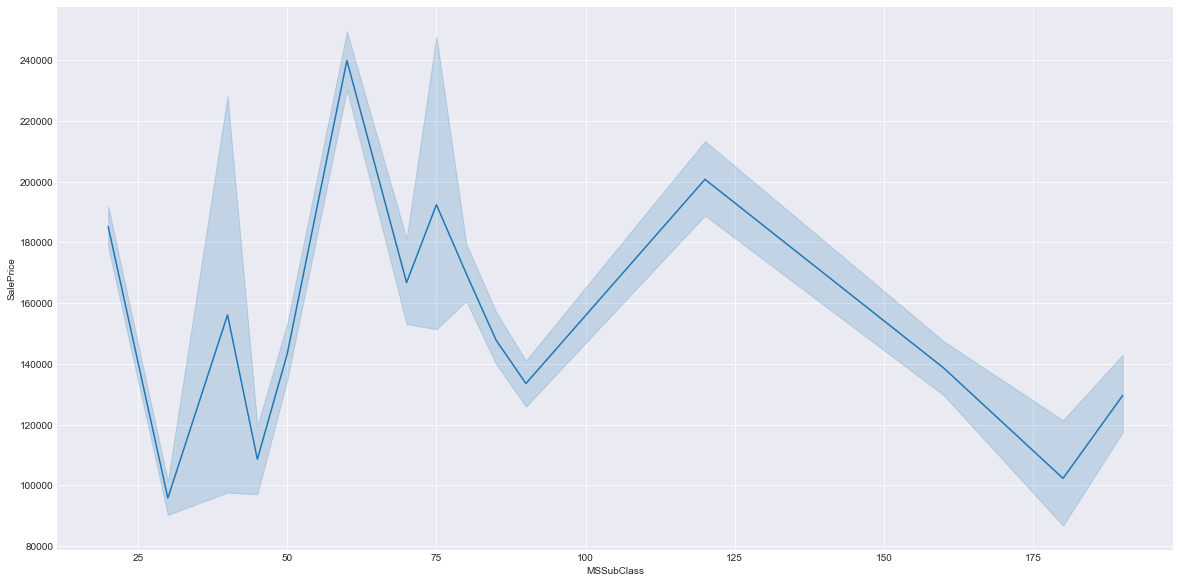

In [35]:
plt.figure(figsize = (20, 10))
sns.lineplot(x = 'MSSubClass', y = 'SalePrice', dashes = False, data = train_data)

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

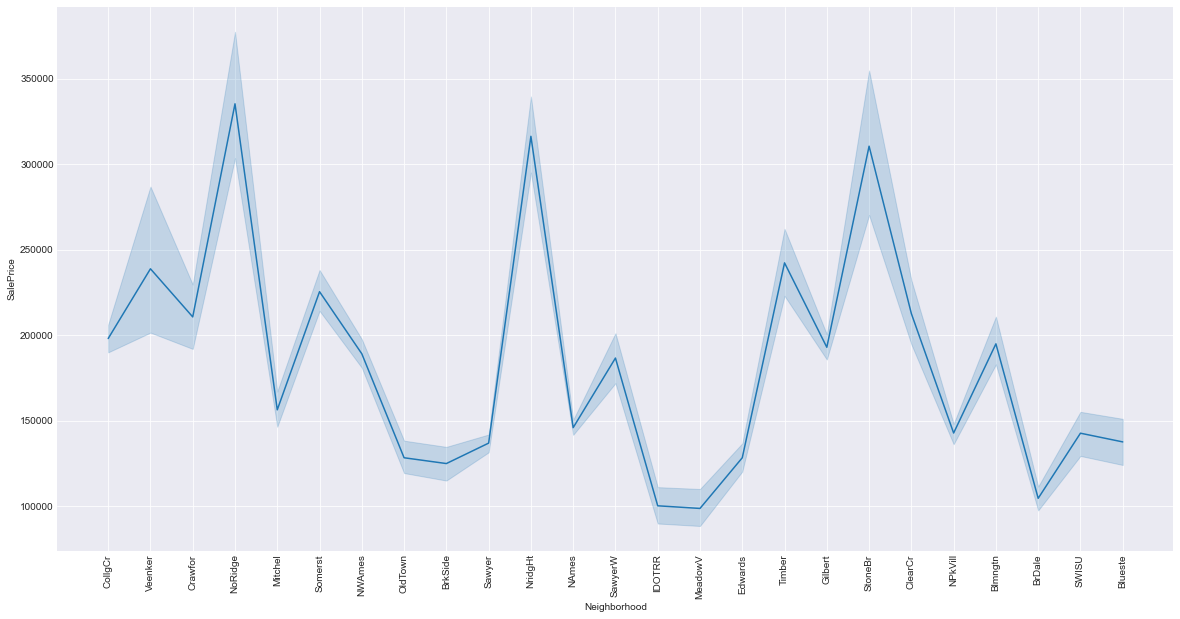

In [36]:
plt.figure(figsize = (20, 10))
plt.xticks(rotation = 90)
sns.lineplot(x = 'Neighborhood', y = 'SalePrice', dashes = False, data = train_data)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

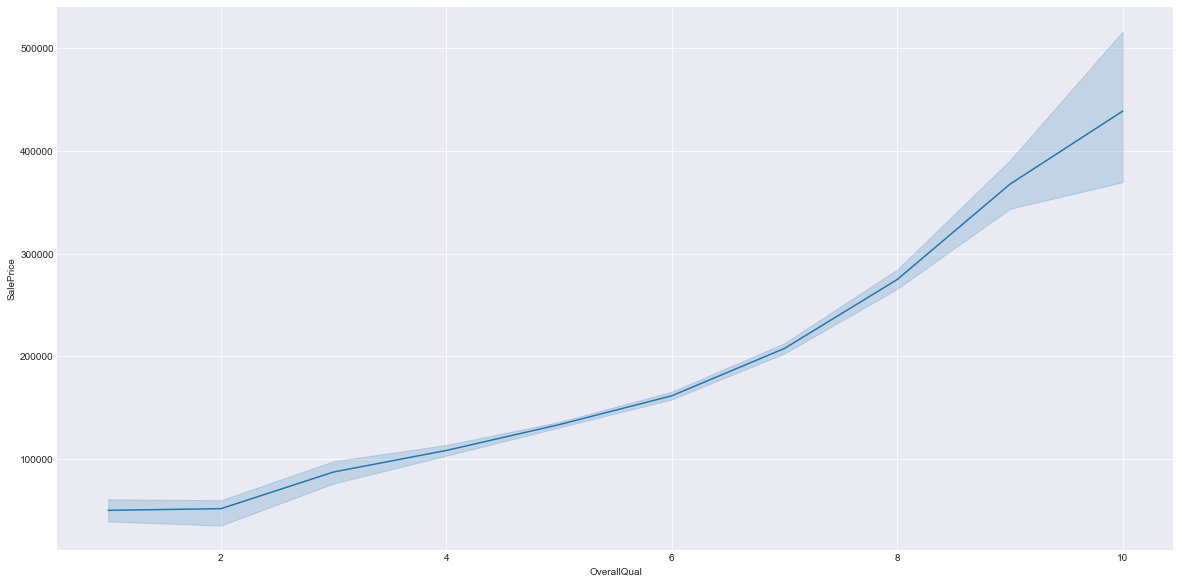

In [37]:
plt.figure(figsize = (20, 10))
sns.lineplot(x = 'OverallQual', y = 'SalePrice', dashes = False, data = train_data)

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

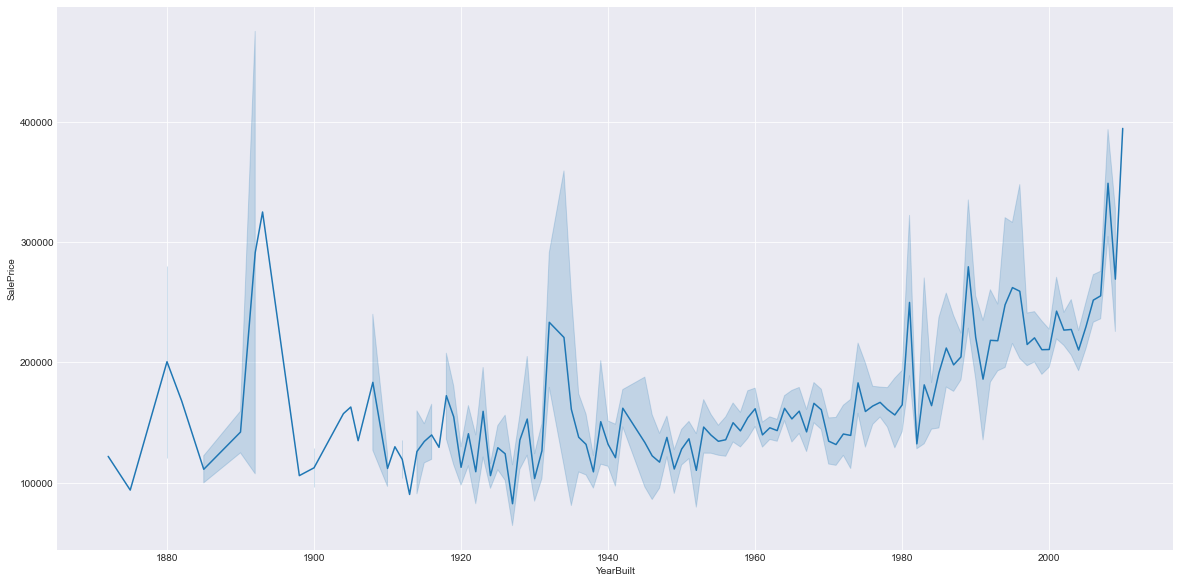

In [38]:
plt.figure(figsize = (20, 10))
sns.lineplot(x = 'YearBuilt', y = 'SalePrice', dashes = False, data = train_data)

# Countplot :
A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. The basic API and options are identical to those for barplot(),

<AxesSubplot:xlabel='YearBuilt', ylabel='count'>

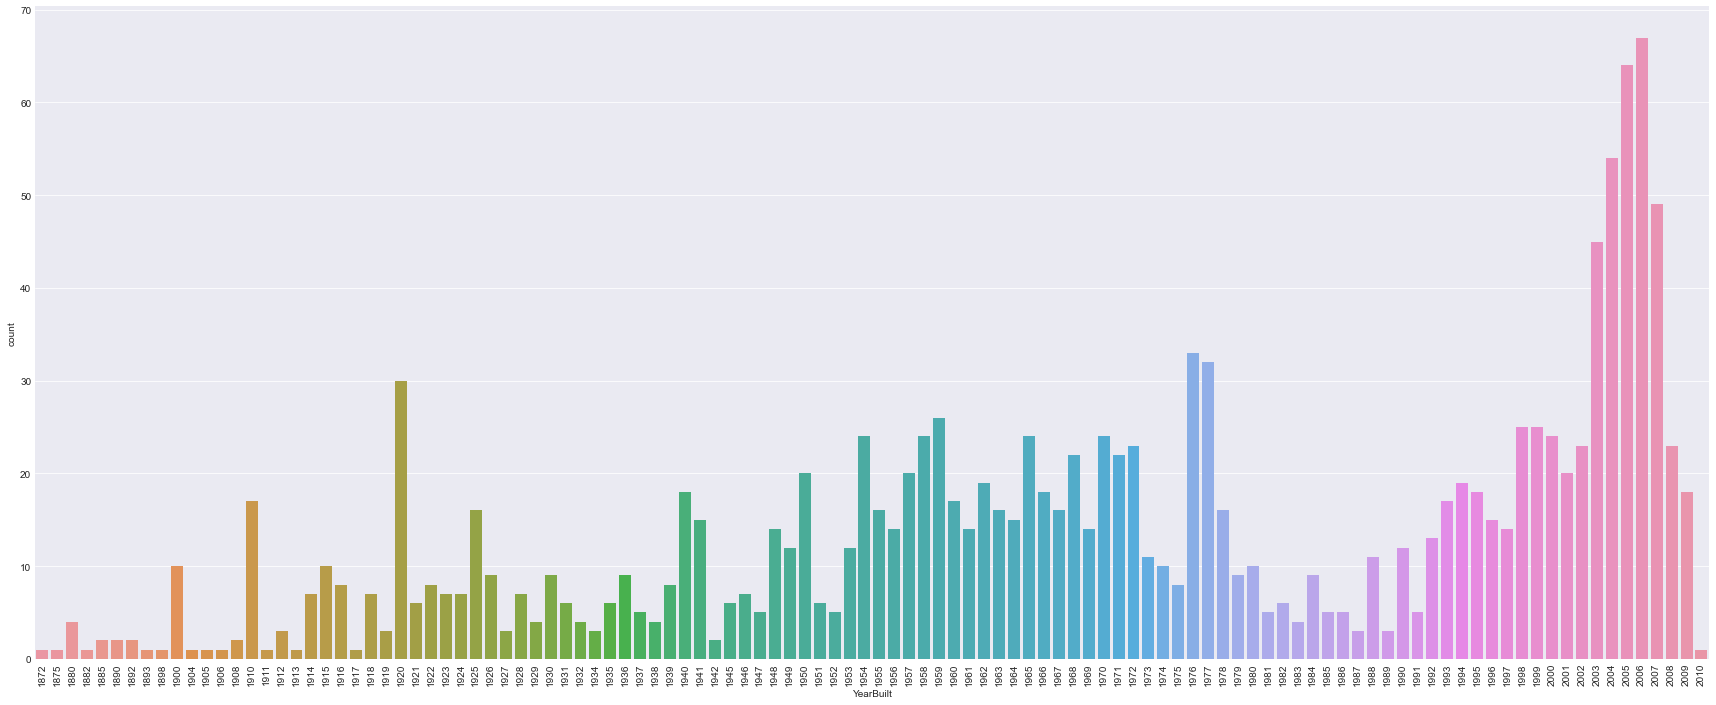

In [39]:
plt.figure(figsize = (30, 12))
plt.xticks(rotation = 90)
sns.countplot('YearBuilt', data = train_data)

<AxesSubplot:xlabel='YearRemodAdd', ylabel='count'>

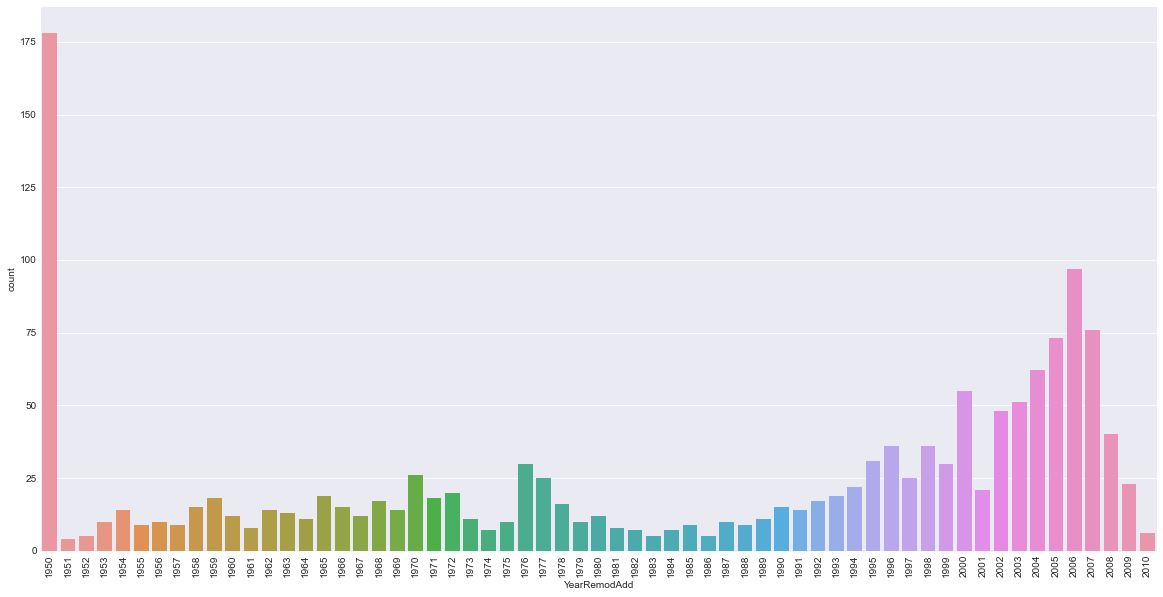

In [40]:
plt.figure(figsize = (20, 10))
plt.xticks(rotation = 90)
sns.countplot('YearRemodAdd', data = train_data)

<AxesSubplot:xlabel='BldgType', ylabel='count'>

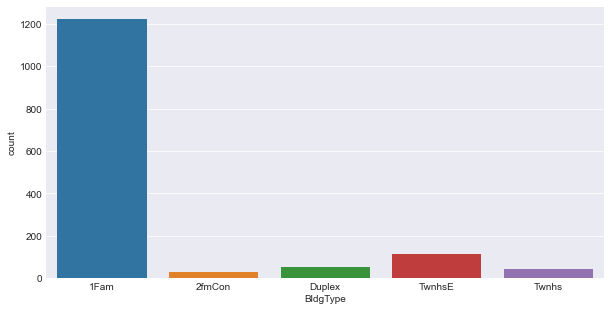

In [41]:

plt.figure(figsize = (10, 5))
sns.countplot('BldgType', data = train_data)

<AxesSubplot:xlabel='BsmtExposure', ylabel='count'>

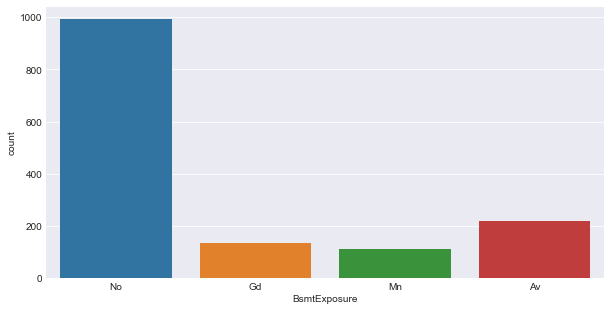

In [42]:
plt.figure(figsize = (10, 5))
sns.countplot('BsmtExposure', data = train_data)

# Now, let's do data preprocessing.

In [43]:
cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 
        'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 
        'BsmtFullBath','BsmtHalfBath','FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
        'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'EnclosedPorch', 'OpenPorchSF', '3SsnPorch', 
        'PoolArea', 'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold',
        'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle','RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
        'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
        'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual','Functional', 'FireplaceQu', 
        'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
X_train = train_data[cols]
Y_train = train_data[['SalePrice']]

In [44]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,Gd,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal


In [45]:
Y_train

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


### Applying StandardScalar() on numeric data columns

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 
        'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 
        'BsmtFullBath','BsmtHalfBath','FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
        'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'EnclosedPorch', 'OpenPorchSF', '3SsnPorch', 
         'PoolArea', 'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold']
X_train[cols] = sc.fit_transform(X_train[cols])

### Applying OrdinalEncoder() on remaining data columns

In [47]:
from sklearn.preprocessing import OrdinalEncoder
oc = OrdinalEncoder()
cols = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle','RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
        'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
        'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual','Functional', 'FireplaceQu', 
        'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
X_train[cols] = oc.fit_transform(X_train[cols])

In [48]:
X_train.head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,0.073375,-2.293718e-01,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,...,2.0,6.0,2.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
1,-0.872563,4.519361e-01,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,...,3.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
2,0.073375,-9.311018e-02,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,...,2.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
3,0.309859,-4.564744e-01,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,...,2.0,6.0,2.0,5.0,2.0,4.0,4.0,2.0,8.0,0.0
4,0.073375,6.336182e-01,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,...,2.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
5,-0.163109,6.790387e-01,0.360616,-0.795151,-0.517200,0.719786,0.491040,-0.570750,0.632450,-0.288653,...,3.0,6.0,2.0,1.0,2.0,4.0,4.0,2.0,8.0,4.0
6,-0.872563,2.248335e-01,-0.043379,1.374795,-0.517200,1.084115,0.975575,0.458754,2.029558,-0.288653,...,2.0,6.0,2.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
7,0.073375,6.454645e-16,-0.013513,0.651479,0.381743,0.057371,-0.574938,0.757643,0.910994,-0.090220,...,3.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
8,-0.163109,-8.652591e-01,-0.440659,0.651479,-0.517200,-1.333700,-1.689368,-0.570750,-0.973018,-0.288653,...,3.0,2.0,4.0,5.0,2.0,1.0,4.0,2.0,8.0,0.0
9,3.147673,-9.106796e-01,-0.310370,-0.795151,0.381743,-1.068734,-1.689368,-0.570750,0.893448,-0.288653,...,3.0,6.0,4.0,1.0,1.0,2.0,4.0,2.0,8.0,4.0


In [49]:
print(X_train.shape)
print(Y_train.shape)

(1460, 75)
(1460, 1)


#### Applying LinearRegression()

In [50]:
from sklearn.linear_model import LinearRegression
classifier = LinearRegression()
classifier.fit(X_train, Y_train)

LinearRegression()

In [51]:

result = classifier.predict(X_train)

#### Plot for Actual Values and Predicted Values

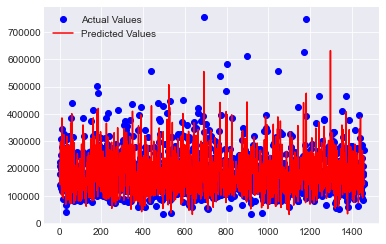

In [52]:
plt.figure(figsize = (6,4))
plt.plot(Y_train, 'o',color = 'blue', label = 'Actual Values')
plt.plot(result, color = 'red', label = 'Predicted Values')
plt.legend()

### Creating DataFrame for storying result.

In [ ]:
test = pd.DataFrame()
test['Actual Values'] = Y_train
test['Predicted_values'] = result
test

In [56]:
l1 = list(sol)
l2 = list(result)
df = pd.DataFrame(list(zip(l1,l2)),columns=['Id','SalePrice'])
df.head()

,Id,SalePrice
0,1461,[219314.4508232489]
1,1462,[200412.55839429464]
2,1463,[222227.92450865702]
3,1464,[141084.26660426002]
4,1465,[294529.90774139005]


In [57]:
df['SalePrice'] = df['SalePrice'].astype(float)

In [58]:
df.head()

,Id,SalePrice
0,1461,219314.450823
1,1462,200412.558394
2,1463,222227.924509
3,1464,141084.266604
4,1465,294529.907741


### Save our DataFrame to CSV file.

In [59]:

df.to_csv('mySubmission.csv',index = False)